In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pylab as pylb
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator, AutoLocator)
%matplotlib inline
plt.style.use('~/Research/stochastic/paper_labels_colors.mplstyle')

In [2]:
colors = {"Bdazzled Blue":"#335471","Cadet Blue":"#69a2b0","Dark purple":"#5e4085",\
"Fern Green":"#58804d","Olivine":"#a1c084","Amaranth":"#dd4053","Light Pink":"#ffa5a5",\
"light purple":"#a885c9","Brown Sugar":"#a9714b","Dark Sienna":"#49111c"}

bmin 1 0.003125
bmin 2 0.0015625


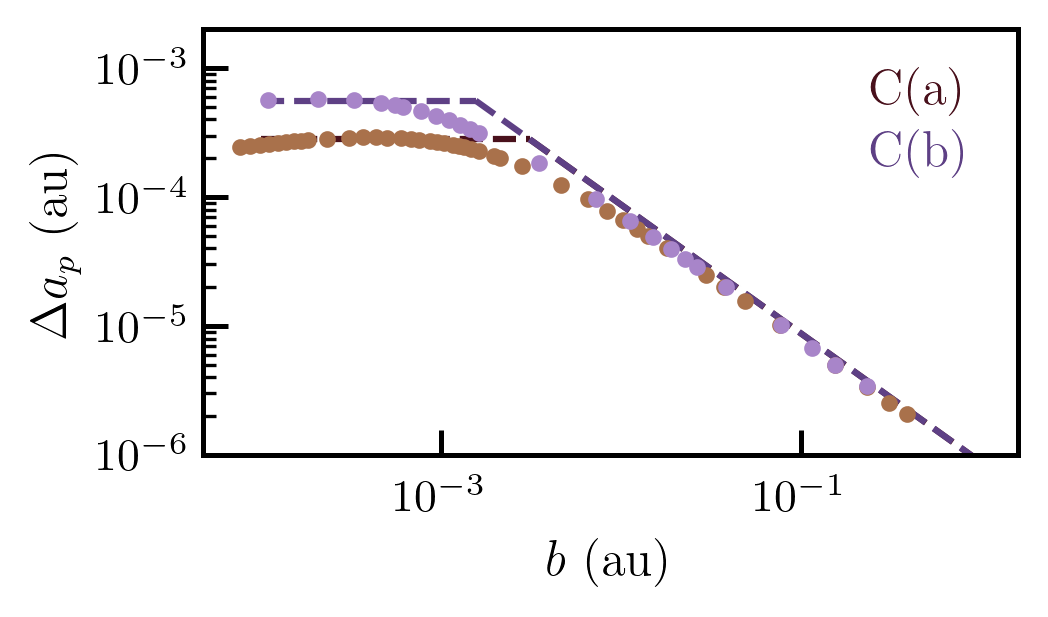

0.00028000000000000003
0.000336


In [3]:
dat_cross1 = np.genfromtxt("/Users/arceliahermosillo/Research/stochastic/LAU_MURRAYCLAY2011/ARCELIA/fig08/crossing1.txt")
dat_cross2 = np.genfromtxt("/Users/arceliahermosillo/Research/stochastic/LAU_MURRAYCLAY2011/ARCELIA/fig08/crossing2.txt")

# constants 
mSun = 1.98e33 #grams
mEarth = 3e-6*mSun #grams
mNep = (5.15e-5)*mSun #grams
mPlut = (6.58e-9)*mSun #grams
G = 6.67e-8 # cgs
AU = 1.496e13 #cm
yr_to_sec = 3.1536e7


def Omegap(Mstar, ap):
    return (G*Mstar/ap**3)**(1/2)

def max_delta_ap_c(i, m, Mp, Mstar, ap, a, e, C1, b):
    if i == 0:
        delap = C1*m*ap*e/Mp
    if i == 1:
        omega = Omegap(Mstar, a)
        delap = 2*C1*G*m*ap/(b*a*a*e*omega**2)
    return delap

mplanetesimal = (1e-10)*mSun
a_p = 28*AU
a_planetesimal = 25*AU
e_planetesimal = 0.4
mplanet1 = (1e-5)*mSun
mplanet2 = (5e-6)*mSun


omega_ = Omegap(mSun, a_planetesimal)

u1 = e_planetesimal*a_planetesimal*omega_

bmin_1 = 2*(G*mplanet1/(u1**2))
bmin_2 = 2*(G*mplanet2/(u1**2))
print("bmin 1",bmin_1/AU)
print("bmin 2", bmin_2/AU)

c1 = 2.5

max_ap_1 = max_delta_ap_c(0, mplanetesimal, mplanet1, mSun, a_p, a_planetesimal, e_planetesimal,c1, bmin_1)
max_ap_2 = max_delta_ap_c(0, mplanetesimal, mplanet2, mSun, a_p, a_planetesimal, e_planetesimal,c1, bmin_2)

b_1 = np.linspace(bmin_1, AU)
b_2 = np.linspace(bmin_2, AU)

max_ap_1_right = max_delta_ap_c(1, mplanetesimal, mplanet1, mSun, a_p, a_planetesimal, e_planetesimal, c1, b_1)
max_ap_2_right = max_delta_ap_c(1, mplanetesimal, mplanet2, mSun, a_p, a_planetesimal, e_planetesimal, c1, b_2)

plt.figure(figsize = (3.5,2))
plt.loglog()
plt.hlines(max_ap_1/AU, 1e-4, bmin_1/AU, colors = colors["Dark Sienna"], linestyles = "dashed")
plt.hlines(max_ap_2/AU, 1e-4, bmin_2/AU, linestyles = "dashed", colors = colors["Dark purple"])
plt.loglog(b_1/AU, max_ap_1_right/AU, '--', label = "scenario 1", c = colors["Dark Sienna"])
plt.loglog(b_2/AU, max_ap_2_right/AU, '--', label= "scenario 2", c = colors["Dark purple"])
plt.loglog(dat_cross1[:,0], dat_cross1[:,1], '.', label = "simulation scenario 1", c = colors["Brown Sugar"])
plt.loglog(dat_cross2[:,0], dat_cross2[:,1], '.', label = "simulation scenario 2", c = colors["light purple"])

plt.ylabel("$\Delta {a}_p$ (au)")
plt.xlabel("$b$ (au)")
plt.ylim(1e-6,2e-3)
plt.annotate("C(a)", (0.83,0.83), xycoords = 'subfigure fraction',color = colors["Dark Sienna"])
plt.annotate("C(b)", (0.83,0.73), xycoords = 'subfigure fraction',color = colors["Dark purple"])
plt.tight_layout(pad=0.35, w_pad=0.5)
plt.tick_params(axis = 'y', which = 'minor', width = 0.8, length = 3)
plt.tick_params(axis='y', which = 'both', right = False)
plt.tick_params(axis='x', which = 'both', top = False)
plt.tick_params(axis='x', which = 'minor', bottom = False)
# plt.savefig('finalplots/crossing.pdf')
plt.show()
print(max_ap_1/AU)
print(max_delta_ap_c(0, mplanetesimal, mplanet1, mSun, a_p, a_planetesimal, e_planetesimal, 3, bmin_1)/AU)